In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import os

In [3]:
gnp_path = '/work/ccnr/glover.co/net_design/NetDesign/data/network_analysis/gnp/'
ba_path = '/work/ccnr/glover.co/net_design/NetDesign/data/network_analysis/ba/'

In [4]:
gnp_comps = np.loadtxt(gnp_path + 'comps.txt')    

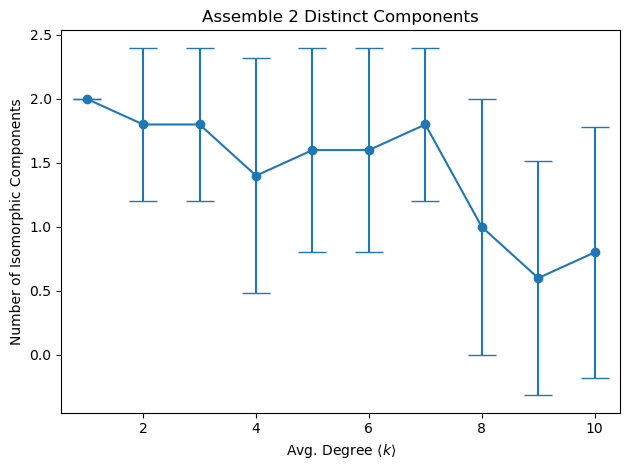

In [23]:
plt.plot(np.arange(1,11),gnp_comps.mean(axis=0),'o',color='tab:blue')
plt.errorbar(np.arange(1,11),gnp_comps.mean(axis=0),yerr=gnp_comps.std(axis=0),color='tab:blue',capsize=10)

plt.xlabel(r'Avg. Degree $\langle k\rangle$')
plt.ylabel('Number of Isomorphic Components')
plt.title('Assemble 2 Distinct Components')
plt.tight_layout()
plt.savefig('gnp.png')
plt.show()

In [6]:
# Get networks
ba_exponents = os.listdir(ba_path)

In [7]:
ba_comps = np.zeros((10, len(ba_exponents)))
for j, alpha_file in enumerate(ba_exponents):
    for i in range(10):
        # Get network
        g = nx.read_edgelist(ba_path + alpha_file + f'/ex_{i}/g.txt')
        recon_g = nx.read_edgelist(ba_path + alpha_file + f'/ex_{i}/recon_g.txt')
        for c in list(nx.connected_components(recon_g)):
            if nx.is_isomorphic(nx.subgraph(recon_g,c),g):
                ba_comps[i,j] += 1

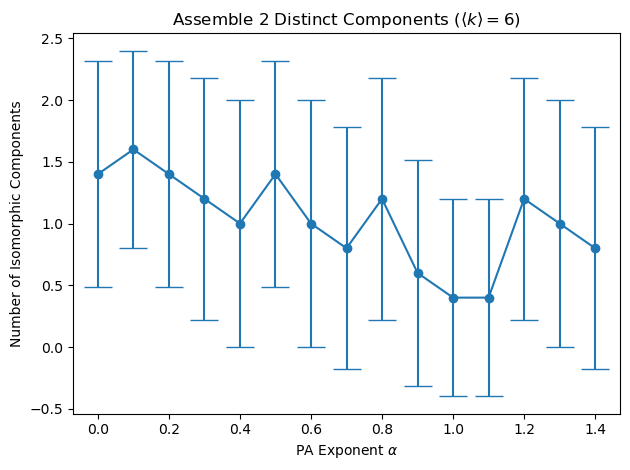

In [22]:
plt.plot(np.linspace(0,2,21)[:len(ba_exponents)],ba_comps.mean(axis=0),'o',color='tab:blue')
plt.errorbar(np.linspace(0,2,21)[:len(ba_exponents)],ba_comps.mean(axis=0),yerr=ba_comps.std(axis=0),color='tab:blue',capsize=10)
plt.xlabel(r'PA Exponent $\alpha$')
plt.ylabel('Number of Isomorphic Components')
plt.title(r'Assemble 2 Distinct Components ($\langle k\rangle=6$)')
plt.tight_layout()
plt.savefig('pa.png')
plt.show()

In [10]:
ba_comps.std(axis=0)

array([0.91651514, 0.8       , 0.91651514, 0.9797959 , 1.        ,
       0.91651514, 1.        , 0.9797959 , 0.9797959 , 0.91651514,
       0.8       , 0.8       , 0.9797959 , 1.        , 0.9797959 ])